## Import

In [38]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, precision_score, f1_score
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

## Data Loader

In [39]:
# df = pd.read_csv('heart.csv') # colab
df = pd.read_csv('../datasets/heart-disease-uci/heart.csv')
df = shuffle(df)

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Normalization

In [40]:
print('before:')
print(df)

columns_names = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns_names)

print('later:')
print(df)

before:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
111   57    1   2       150   126    1        1      173      0      0.2   
288   57    1   0       110   335    0        1      143      1      3.0   
189   41    1   0       110   172    0        0      158      0      0.0   
161   55    0   1       132   342    0        1      166      0      1.2   
290   61    1   0       148   203    0        1      161      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
206   59    1   0       110   239    0        0      142      1      1.2   
68    44    1   1       120   220    0        1      170      0      0.0   
152   64    1   3       170   227    0        0      155      0      0.6   
256   58    1   0       128   259    0        0      130      1      3.0   
57    45    1   0       115   260    0        0      185      0      0.0   

     slope  ca  thal  target  
111      2   1     3       1  
288      1   1   

## Dataset Splitting

In [41]:
train_percent = 0.95
train_amount = int(df.shape[0] * train_percent)

train = df[:train_amount].copy()
test  = df[train_amount:].copy()

print('train:', len(train))
print('test:', len(test))

train: 287
test: 16


In [42]:
input_train = train.copy().drop(columns=['target'])
output_train = train.copy()['target']
output_train = pd.DataFrame(output_train)

input_test = test.copy().drop(columns=['target'])
output_test = test.copy()['target']
output_test = pd.DataFrame(output_test)

print('input_train:', input_train.shape)
print('output_train:', output_train.shape)

print('input_test:', input_test.shape)
print('output_test:', output_test.shape)

input_train: (287, 13)
output_train: (287, 1)
input_test: (16, 13)
output_test: (16, 1)


### Evaluate Model

In [43]:
def fit_evaluate(model, input_train, output_train, input_test, output_test):
    model.fit(input_train, output_train)

    predicted_values = model.predict(input_test)
    
    accuracy_scor = accuracy_score(output_test, predicted_values)
    recall_scor = recall_score(output_test, predicted_values)
    average_precision_scor = average_precision_score(output_test, predicted_values)
    precision_scor = precision_score(output_test, predicted_values)
    f1_scor = f1_score(output_test, predicted_values)
    
    return accuracy_scor, recall_scor, average_precision_scor, precision_scor, f1_scor

In [44]:
final_model = svm.SVC(kernel='rbf', C=2, gamma=0.1)
accuracy_scor, recall_scor, average_precision_scor, precision_scor, f1_scor = fit_evaluate(final_model, input_train, output_train, input_test, output_test)
print('accuracy: ', accuracy_scor, 'recall_score: ', recall_scor, 'average_precision_score: ', average_precision_scor, 'precision_score:', precision_scor, 'f1_score:', f1_scor)


accuracy:  0.8125 recall_score:  0.9 average_precision_score:  0.7988636363636364 precision_score: 0.8181818181818182 f1_score: 0.8571428571428572


/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Tunning

In [9]:
print('varying regularization parameter:')
c = 0.1
regularization_results = []
while c < 10:
  model_tunned = svm.SVC(kernel="rbf", C=c)
  model_accuracy = fit_evaluate(model_tunned, input_train, output_train, input_test, output_test)
  # print('c = %d - %f' % (c, model_accuracy))
  regularization_results.append([c, model_accuracy])
  c += 0.1

print('varying gamma parameter:')
gamma = 0.1
gamma_results = []
while gamma < 5:
  model_tunned = svm.SVC(kernel="rbf", C=4, gamma=gamma)
  model_accuracy = fit_evaluate(model_tunned, input_train, output_train, input_test, output_test)
  # print('gamma = %f - %f' % (gamma, model_accuracy))
  gamma_results.append([gamma, model_accuracy])
  gamma += 0.1

varying regularization parameter:


/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.p

/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.p

/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.p

varying gamma parameter:


/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jonas/.programs/anaconda3/envs/advanced_ia/lib/python3.7/site-packages/sklearn/utils/validation.p

### Plot model tunning results

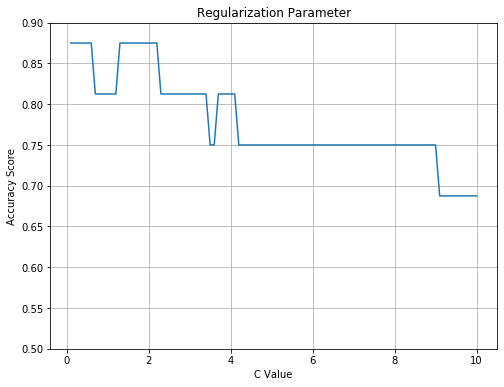

In [10]:
regularization_results = np.array(regularization_results)
gamma_results = np.array(gamma_results)

plt.figure(figsize=(8,6))
plt.title("Regularization Parameter")
plt.xlabel("C Value")
plt.ylabel("Accuracy Score")
plt.plot(regularization_results[:, 0], regularization_results[:, 1])
plt.axis(ymin=0.5, ymax=0.9)
plt.grid(True, which='major')
plt.savefig("regularization_0-10.png")
plt.show()

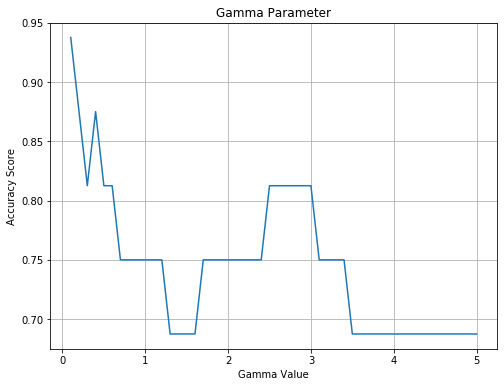

In [12]:
regularization_results = np.array(regularization_results)
gamma_results = np.array(gamma_results)

plt.figure(figsize=(8,6))
plt.title("Gamma Parameter")
plt.xlabel("Gamma Value")
plt.ylabel("Accuracy Score")
plt.plot(gamma_results[:, 0], gamma_results[:, 1])
# plt.axis(ymin=0.8, ymax=1.0)
plt.grid(True, which='major')
plt.savefig("gamma_0-5.png")
plt.show()